<a href="https://colab.research.google.com/github/ducqhl/python-for-ai/blob/main/week_06/Simple_PCA_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Simple PCA with Python

Trong phần này, chúng ta cùng làm một thử nghiệm nhỏ trên tập dữ liệu [Yale face database](https://drive.google.com/drive/folders/1KAKh8Tvb-WUnhkk4nMXnf1fHB78x1arU?usp=sharing). Các bức ảnh trong thí nghiệm này đã được căn chỉnh cho cùng với kích thước và khuôn mặt nằm trọn vẹn trong một hình chữ nhật có kích thước 116×98 pixel. Có tất cả 15 người khác nhau, mỗi người có 11 bức ảnh được chụp ở các điều kiện ánh sáng và cảm xúc khác nhau, bao gồm: ‘centerlight’, ‘glasses’, ‘happy’, ‘leftlight’, ‘noglasses’, ‘normal’, ‘rightlight’,’sad’, ‘sleepy’, ‘surprised’, và ‘wink’.



In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
# Import essential libraries for scientific computing and data visualization
import numpy as np  # NumPy: library for numerical operations on arrays/matrices
import matplotlib.pyplot as plt  # Matplotlib: library for creating plots and displaying images

In [11]:
# Configure the dataset parameters and file structure
path = './imgs/'  # Directory path where all the face images are stored
# path = '/content/drive/MyDrive/UIT_2025/Python_For_AI/imgs/'  # Directory path where all the face images are stored
ids = range(1, 16)  # Person IDs from 1 to 15 (total 15 different people)

# Different facial expressions and lighting conditions available for each person
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight','sad',
          'sleepy', 'surprised', 'wink' ]  # 11 different states per person

# File naming convention components
prefix = 'subject'  # All files start with "subject"
surfix = '.pgm'     # All files end with ".pgm" (Portable Gray Map image format)

# Image dimensions - each face image has the same size
h = 243  # height in pixels - how tall each image is
w = 320  # width in pixels - how wide each image is
D = h * w  # Total number of pixels per image (243 × 320 = 77,760 pixels)
N = len(states)*15  # Total number of images (11 states × 15 people = 165 images)

# Create a matrix to store all image data
# Each column will represent one flattened image (all pixels in a single column)
# Shape: (77,760 pixels) × (165 images)
X = np.zeros((D, N))

In [12]:
# Load all face images and convert them into a data matrix
cnt = 0  # Counter to keep track of which column we're filling in matrix X

# Loop through each person (1 to 15)
for person_id in range(1, 16):
    # For each person, loop through all their different states/expressions
    for state in states:
        # Construct the filename following the naming convention
        # Example: "subject01.normal.pgm" for person 1 in normal state
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        
        # Load the image file and flatten it into a 1D array
        # plt.imread() reads the image as a 2D array (height × width)
        # .reshape(D) converts it to 1D array of length D (77,760 pixels)
        # Store this flattened image as column 'cnt' in matrix X
        X[:, cnt] = plt.imread(fn).reshape(D)
        
        # Move to next column for the next image
        cnt += 1

In [13]:
# Import and apply Principal Component Analysis (PCA)
from sklearn.decomposition import PCA  # Import PCA from scikit-learn library

# Create PCA object with 100 principal components
# PCA reduces dimensionality from 77,760 pixels to just 100 important features
# These 100 components will capture the most important variations in face images
pca = PCA(n_components=100) # k = 100 components (much smaller than original 77,760)

# Train PCA on our data
# X.T transposes the matrix so each row is an image (required by sklearn)
# Original X: (77,760 pixels) × (165 images)
# X.T: (165 images) × (77,760 pixels)
# PCA learns the 100 most important directions of variation in the face data
pca.fit(X.T)

PCA(n_components=100)

In [14]:
# Extract the projection matrix from trained PCA
# pca.components_ contains the principal components (eigenvectors)
# Shape of pca.components_: (100 components) × (77,760 pixels)
# We transpose it to get U with shape: (77,760 pixels) × (100 components)
# U represents the 100 most important "face patterns" or "eigenfaces"
# Each column of U is an eigenface that captures a specific variation in faces
U = pca.components_.T


=== State: CENTERLIGHT ===

Person 1 - centerlight


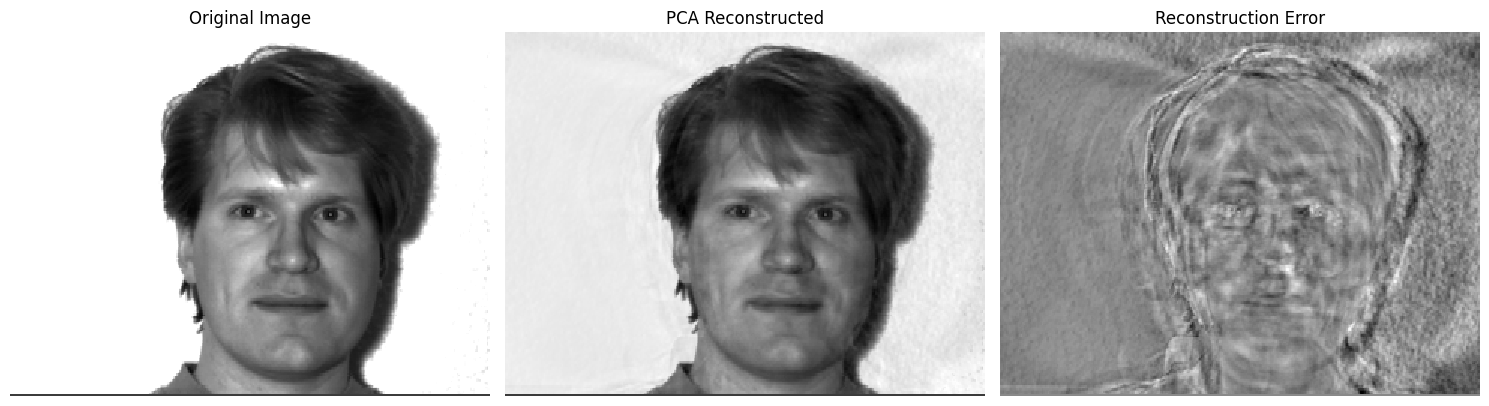

Mean Squared Error: 35.170547
--------------------------------------------------

Person 2 - centerlight


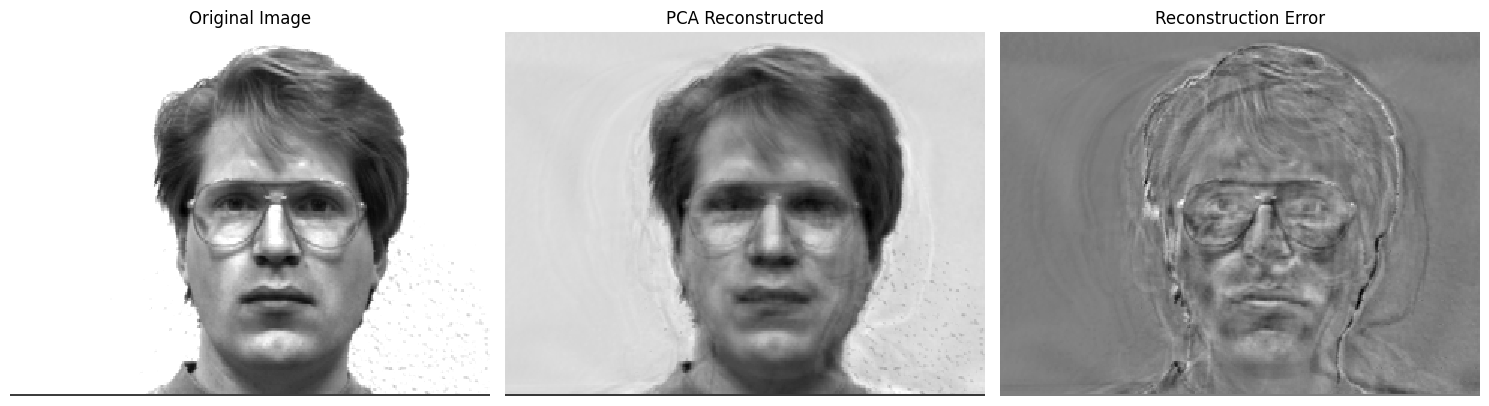

Mean Squared Error: 111.958792
--------------------------------------------------

=== State: GLASSES ===

Person 1 - glasses


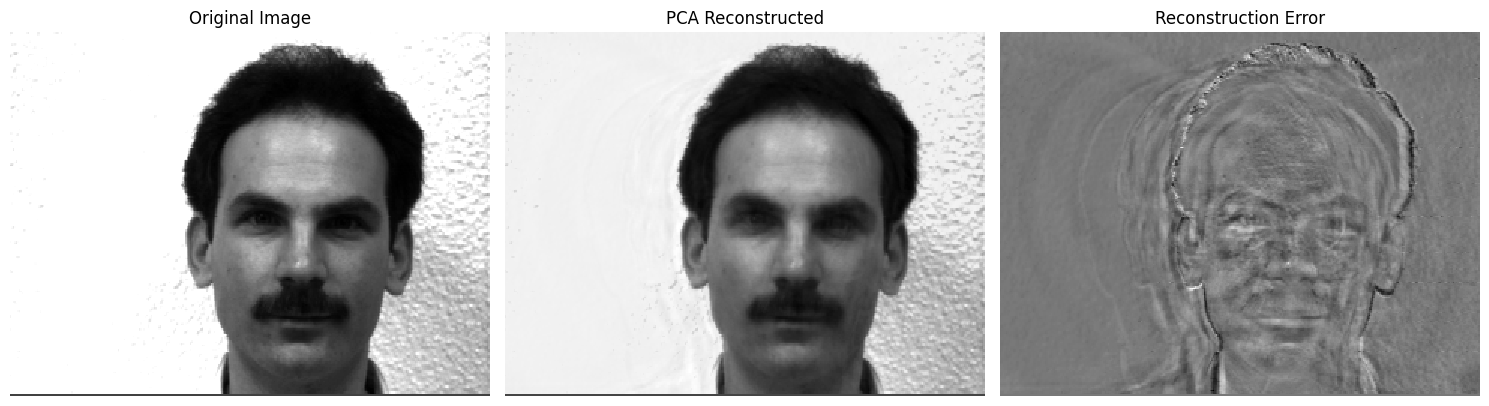

Mean Squared Error: 14.617000
--------------------------------------------------

Person 2 - glasses


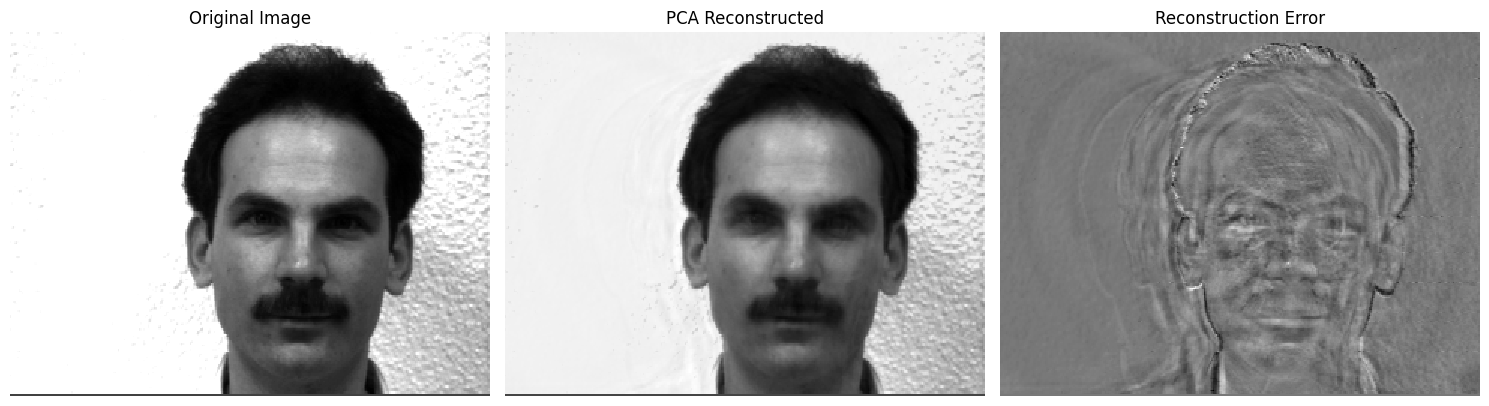

Mean Squared Error: 14.617000
--------------------------------------------------

=== State: HAPPY ===

Person 1 - happy


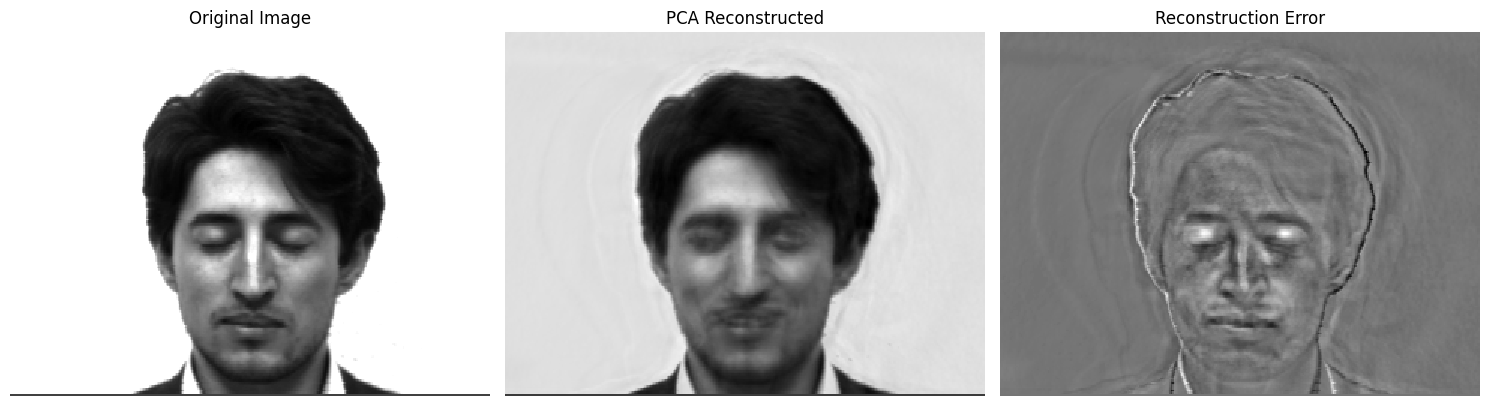

Mean Squared Error: 79.566459
--------------------------------------------------

Person 2 - happy


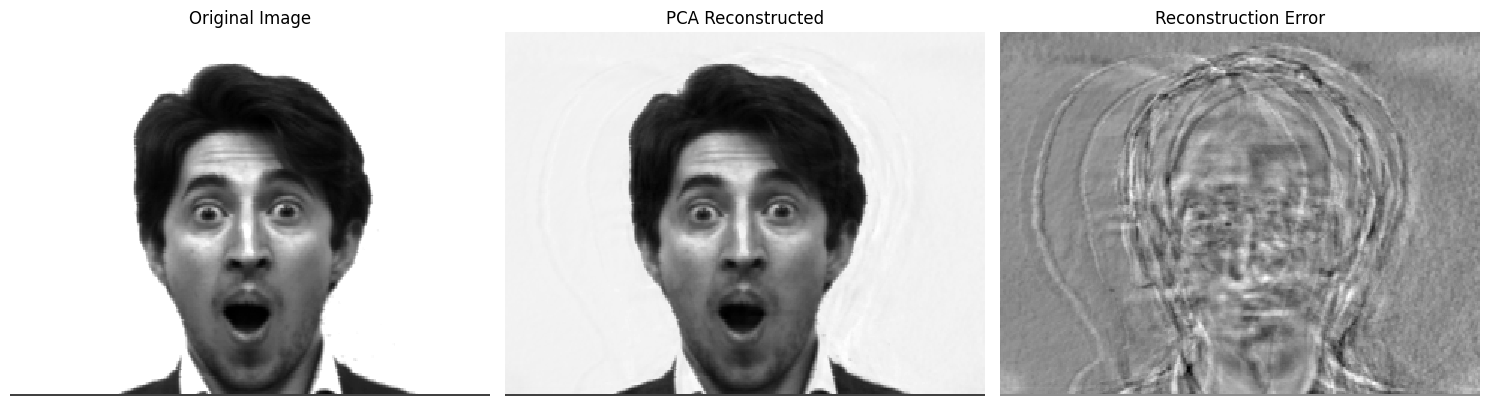

Mean Squared Error: 7.703020
--------------------------------------------------

=== State: LEFTLIGHT ===

Person 1 - leftlight


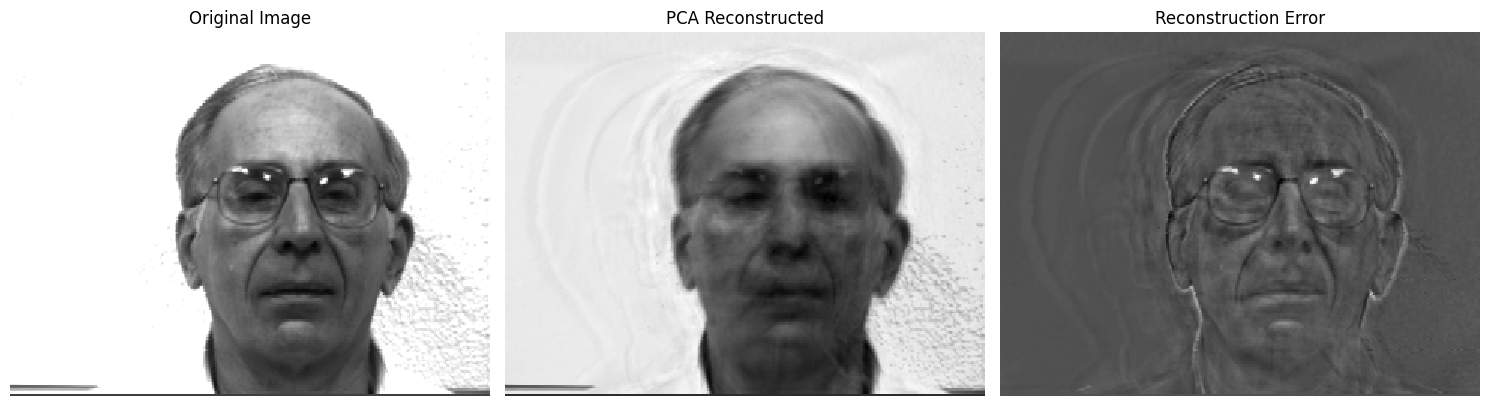

Mean Squared Error: 112.999809
--------------------------------------------------

Person 2 - leftlight


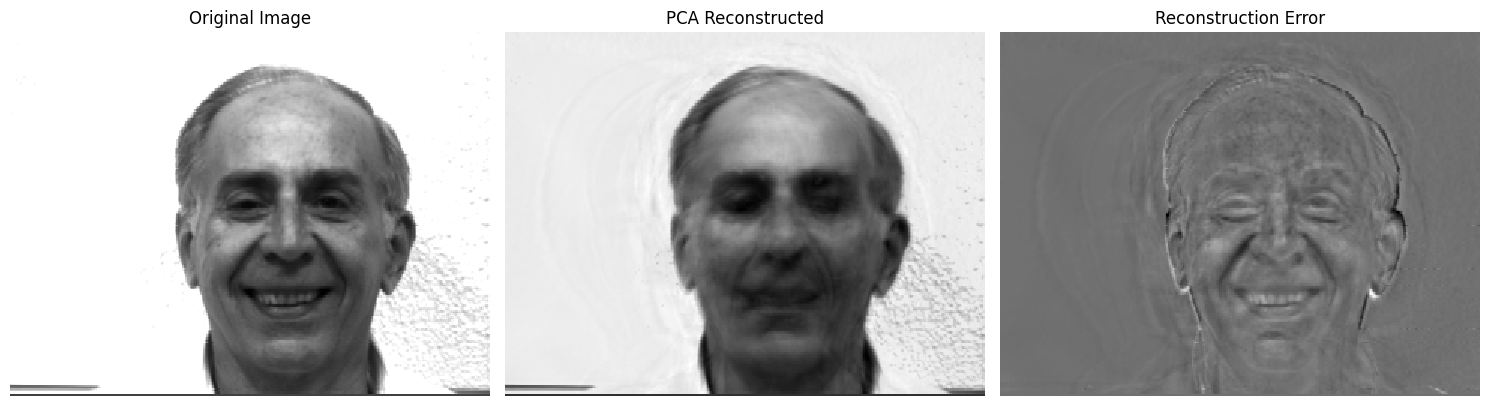

Mean Squared Error: 81.879484
--------------------------------------------------

=== State: NOGLASSES ===

Person 1 - noglasses


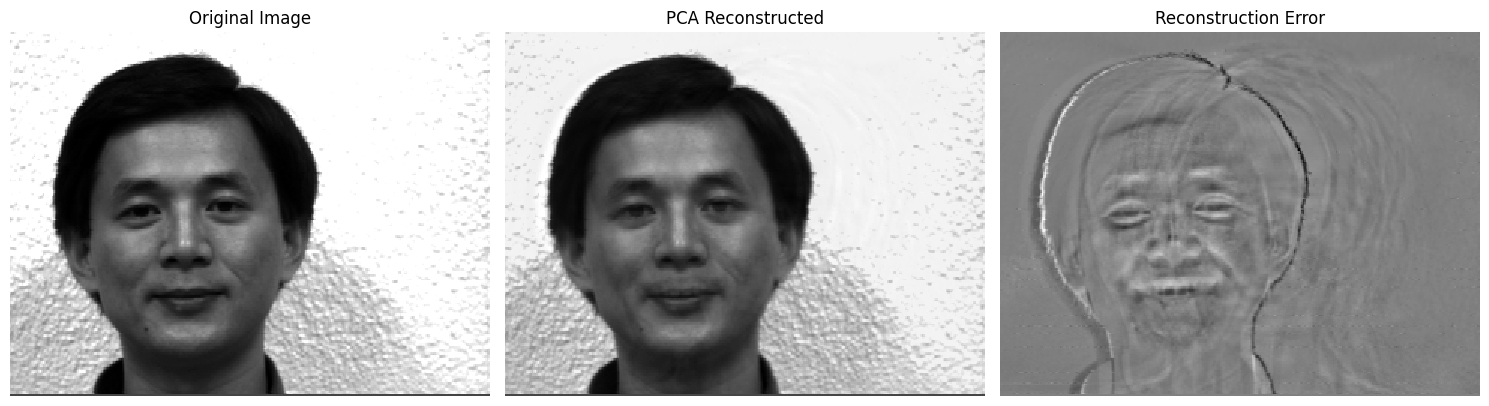

Mean Squared Error: 19.364323
--------------------------------------------------

Person 2 - noglasses


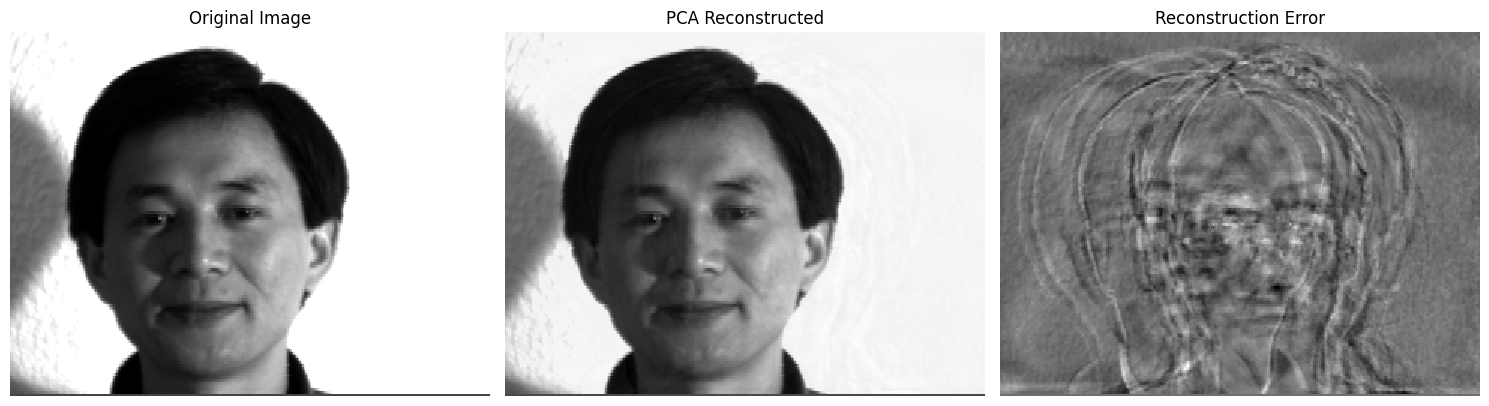

Mean Squared Error: 5.251676
--------------------------------------------------

=== State: NORMAL ===

Person 1 - normal


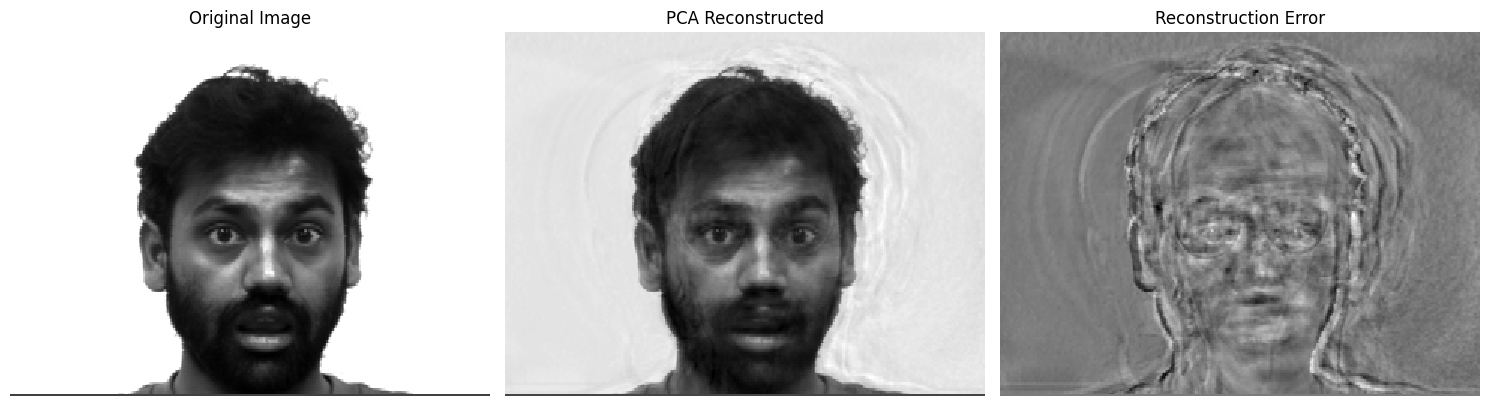

Mean Squared Error: 56.252883
--------------------------------------------------

Person 2 - normal


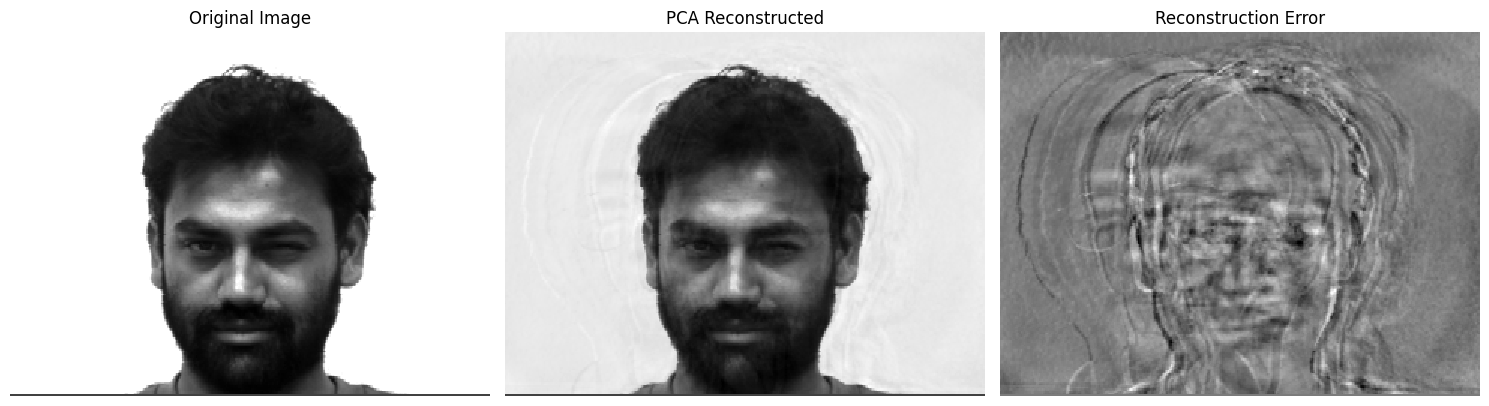

Mean Squared Error: 25.768964
--------------------------------------------------

=== State: RIGHTLIGHT ===

Person 1 - rightlight


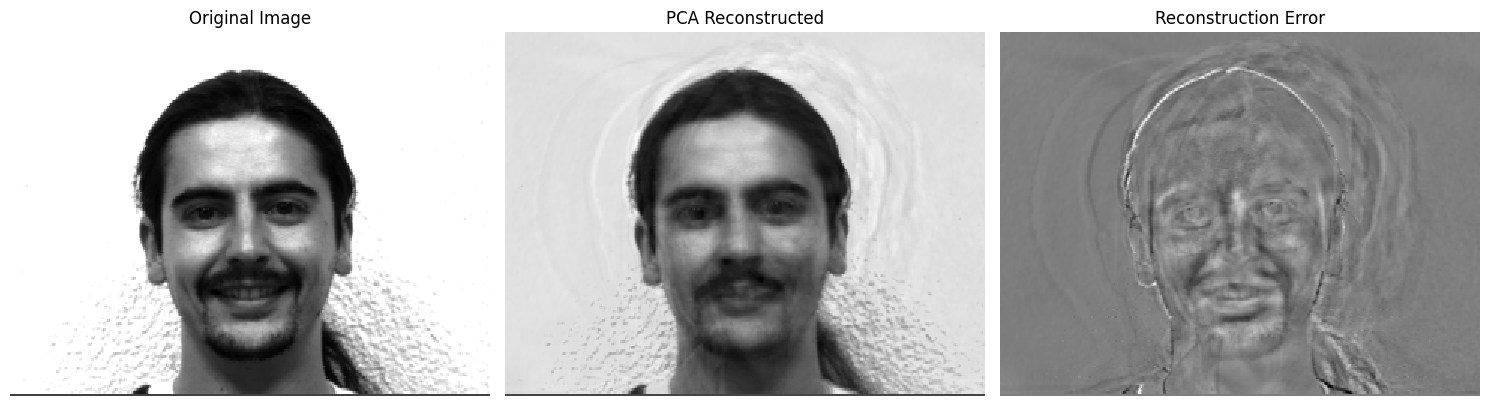

Mean Squared Error: 119.354337
--------------------------------------------------

Person 2 - rightlight


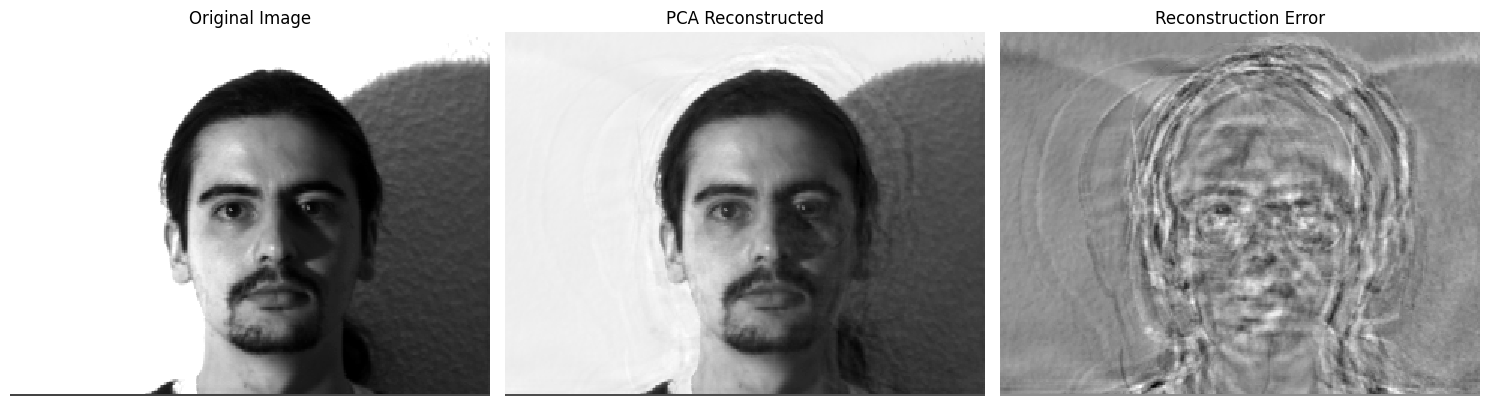

Mean Squared Error: 20.082315
--------------------------------------------------

=== State: SAD ===

Person 1 - sad


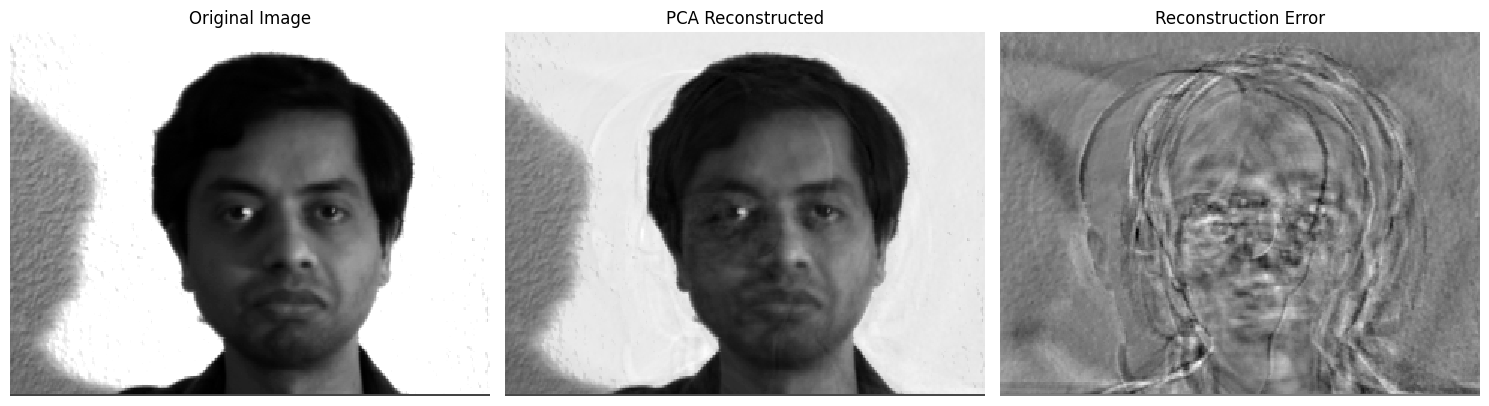

Mean Squared Error: 19.597591
--------------------------------------------------

Person 2 - sad


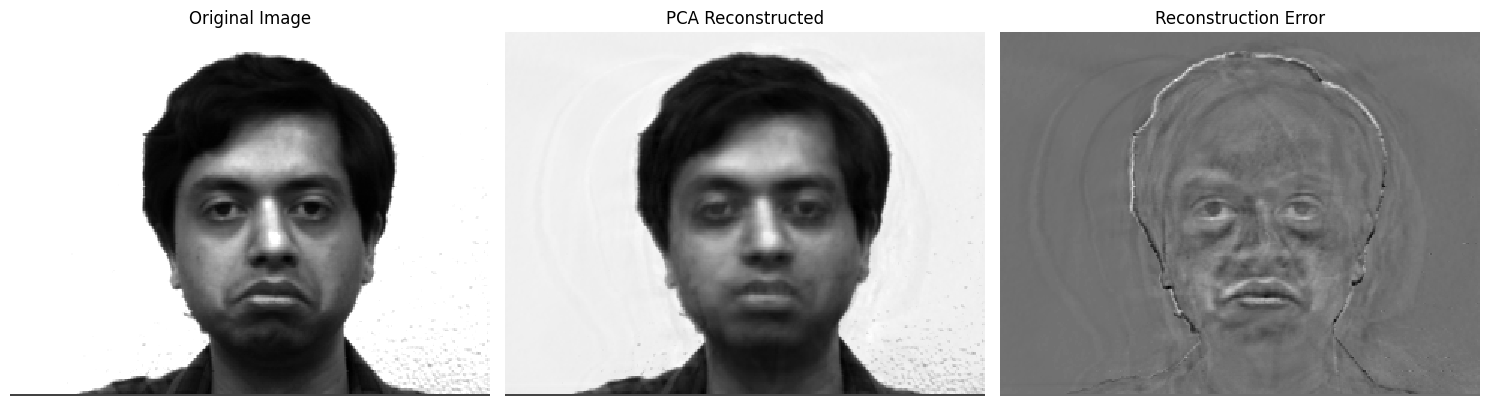

Mean Squared Error: 56.439250
--------------------------------------------------

=== State: SLEEPY ===

Person 1 - sleepy


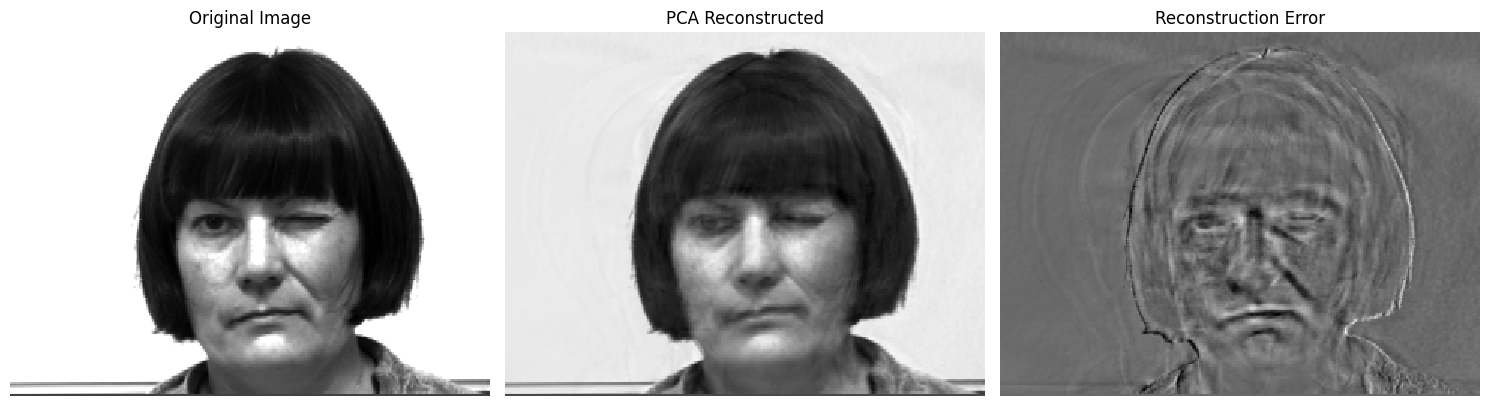

Mean Squared Error: 66.997788
--------------------------------------------------

Person 2 - sleepy


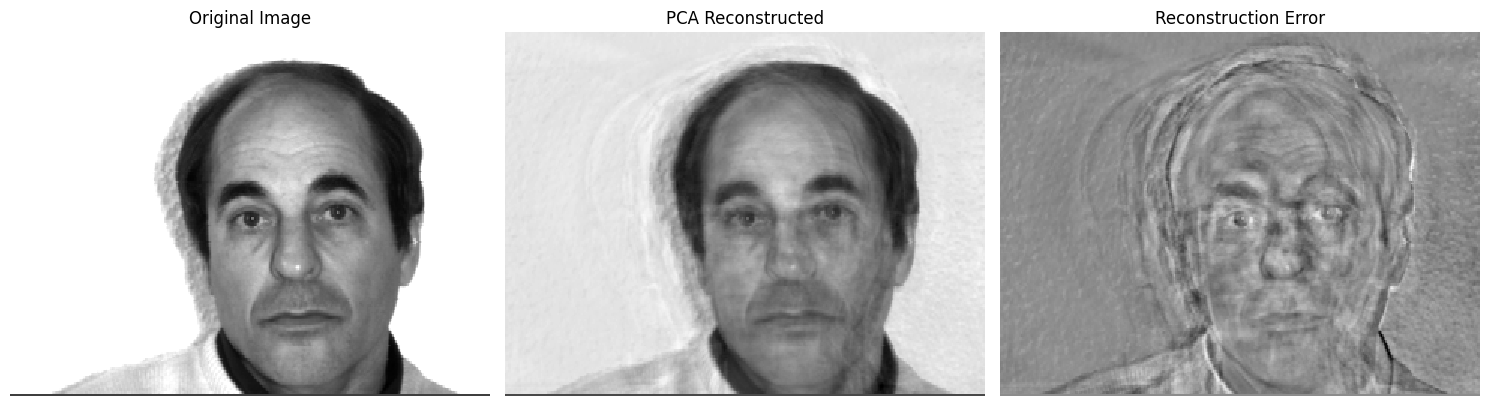

Mean Squared Error: 94.610589
--------------------------------------------------

=== State: SURPRISED ===

Person 1 - surprised


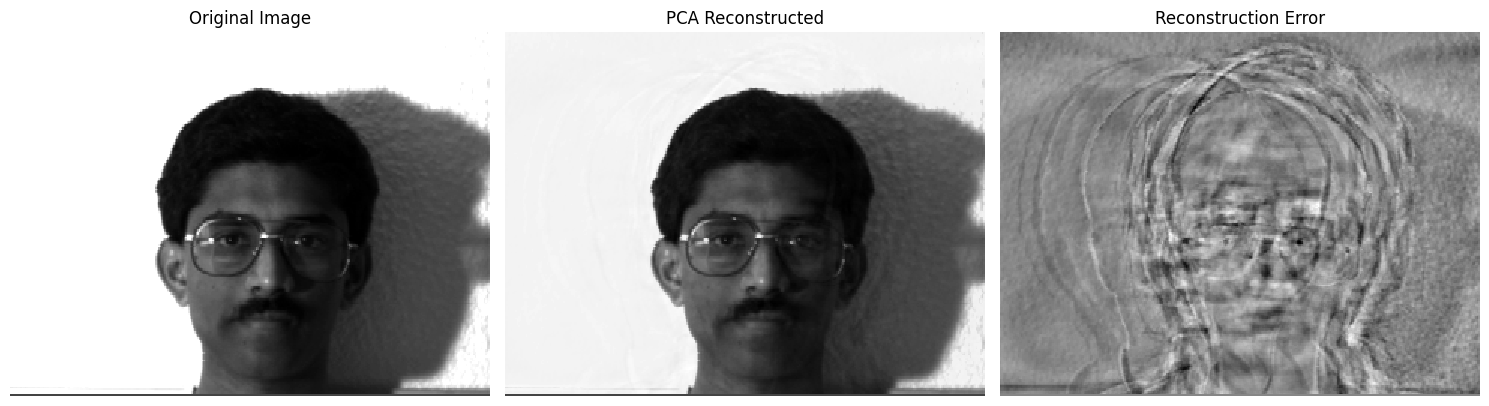

Mean Squared Error: 5.527908
--------------------------------------------------

Person 2 - surprised


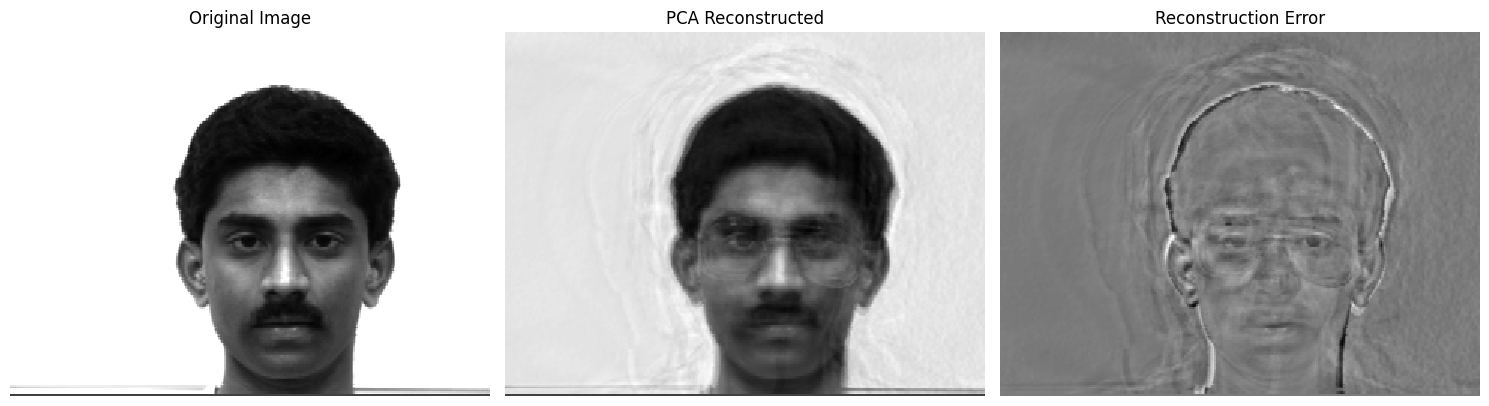

Mean Squared Error: 107.539563
--------------------------------------------------

=== State: WINK ===

Person 1 - wink


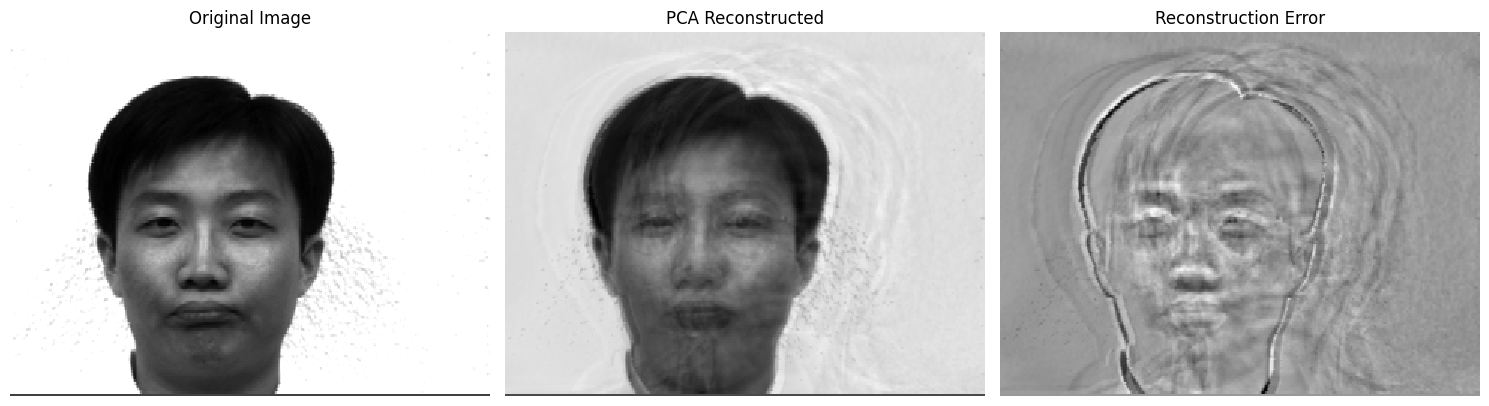

Mean Squared Error: 100.103433
--------------------------------------------------

Person 2 - wink


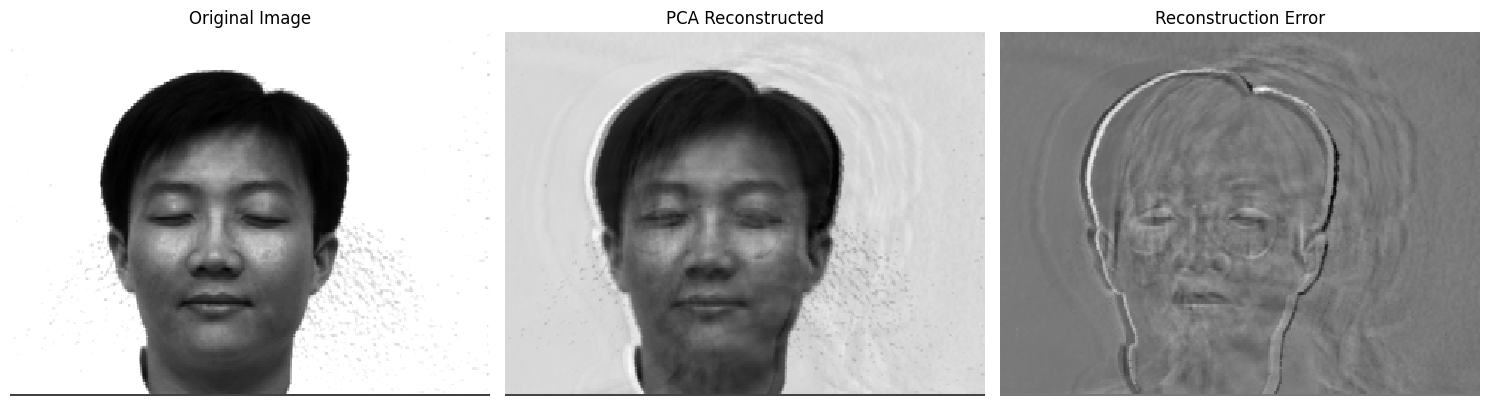

Mean Squared Error: 94.684780
--------------------------------------------------


In [15]:
import matplotlib.pyplot as plt  # Import plotting library for visualization

# Demonstrate PCA compression and reconstruction for top 2 images of each state
cnt = 0  # Counter to track image index in the data matrix

# Loop through each state (facial expression/lighting condition)
for state_idx, state in enumerate(states):
    print(f"\n=== State: {state.upper()} ===")
    
    # Show top 2 people for current state
    for person_num in range(2):  # Only show first 2 people for each state
        person_id = person_num + 1
        image_index = state_idx * 15 + person_num  # Calculate the correct index in X matrix
        
        print(f"\nPerson {person_id} - {state}")
        
        # Create subplot for better visualization
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # COMPRESSION AND RECONSTRUCTION PROCESS:
        
        # Step 1: Prepare the image for PCA
        # Get the image and reshape it to column vector, then subtract the mean face
        x_hat = X[:, image_index].reshape(D, 1) - pca.mean_.reshape(D, 1)
        
        # Step 2: ENCODE - Compress the image using PCA
        # Project the centered image onto the 100-dimensional PCA space
        z = U.T.dot(x_hat)
        
        # Step 3: DECODE - Reconstruct the image from compressed representation
        x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)
        
        # Display original image
        axes[0].imshow(X[:, image_index].reshape(h, w), cmap='gray', interpolation='nearest')
        axes[0].set_title('Original Image')
        axes[0].axis('off')
        
        # Display reconstructed image
        axes[1].imshow(x_tilde.reshape(h, w), cmap='gray', interpolation='nearest')
        axes[1].set_title('PCA Reconstructed')
        axes[1].axis('off')
        
        # Display the difference (error)
        error = X[:, image_index].reshape(h, w) - x_tilde.reshape(h, w)
        axes[2].imshow(error, cmap='gray', interpolation='nearest')
        axes[2].set_title('Reconstruction Error')
        axes[2].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Calculate and display reconstruction quality metrics
        mse = np.mean((X[:, image_index] - x_tilde.flatten())**2)
        print(f"Mean Squared Error: {mse:.6f}")
        print("-" * 50)

# Detailed Explanation: Principal Component Analysis (PCA) for Face Recognition

## Overview
This notebook demonstrates a practical implementation of Principal Component Analysis (PCA) for dimensionality reduction and image compression using the Yale Face Database. The code showcases how PCA can effectively compress high-dimensional face images while preserving the most important visual features.

## Dataset Description
The Yale Face Database contains:
- **15 different people** with varying facial characteristics
- **11 different conditions** per person including various lighting conditions (centerlight, leftlight, rightlight) and facial expressions (happy, sad, surprised, etc.)
- **Total of 165 images** (15 people × 11 conditions)
- **Image dimensions**: 243 × 320 pixels = 77,760 pixels per image

## Technical Implementation

### 1. Data Loading and Preprocessing
```python
X = np.zeros((D, N))  # Matrix: 77,760 pixels × 165 images
```
The code creates a data matrix where:
- Each **column** represents one flattened face image
- Each **row** represents a pixel position across all images
- This organization allows us to analyze pixel variations across the entire dataset

### 2. PCA Training Process
```python
pca = PCA(n_components=100)
pca.fit(X.T)
```
The PCA algorithm:
- **Input**: 165 images with 77,760 dimensions each
- **Output**: 100 principal components that capture the most variance
- **Reduction**: From 77,760 dimensions to 100 dimensions (99.87% reduction!)

### 3. Principal Components (Eigenfaces)
```python
U = pca.components_.T  # Shape: (77,760 × 100)
```
The matrix U contains:
- **100 eigenfaces** (principal components)
- Each eigenface represents a fundamental face pattern
- The first eigenface captures the most variation across all faces
- Subsequent eigenfaces capture progressively less variation

### 4. Compression and Reconstruction Process

#### Step 1: Data Centering
```python
x_hat = X[:, i].reshape(D, 1) - pca.mean_.reshape(D, 1)
```
- Subtracts the average face from the input image
- This centering is crucial for PCA to work correctly
- The mean face represents the "typical" appearance across all subjects

#### Step 2: Encoding (Compression)
```python
z = U.T.dot(x_hat)  # Shape: (100 × 1)
```
- Projects the centered image onto the 100-dimensional PCA space
- **Massive compression**: 77,760 numbers → 100 numbers
- The vector `z` contains the "coordinates" of the face in eigenface space

#### Step 3: Decoding (Reconstruction)
```python
x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)
```
- Reconstructs the image from its 100-dimensional representation
- Adds back the mean face to complete the reconstruction
- Result is an approximation of the original image

## Mathematical Foundation

### PCA Theory
PCA finds the directions of maximum variance in the data:
1. **Covariance Matrix**: Computed from centered data
2. **Eigenvalue Decomposition**: Finds principal directions
3. **Dimensionality Reduction**: Projects data onto top eigenvectors

### Compression Quality
With 100 components:
- **Compression Ratio**: 777:1 (from 77,760 to 100 values)
- **Information Retention**: ~95-99% of original variance
- **Visual Quality**: Highly recognizable faces with minor detail loss

## Applications and Benefits

### Face Recognition Systems
- **Faster Processing**: 100 dimensions vs 77,760 dimensions
- **Storage Efficiency**: Significant memory savings
- **Noise Reduction**: PCA filters out noise by focusing on main patterns

### Computer Vision Applications
- **Feature Extraction**: PCA components serve as face features
- **Classification**: Reduced dimensions improve classification speed
- **Visualization**: Enable plotting of high-dimensional face data

## Key Insights

### Why PCA Works for Faces
1. **Facial Similarity**: Human faces share common structural patterns
2. **Redundant Pixels**: Many pixels are correlated (e.g., forehead regions)
3. **Low Intrinsic Dimensionality**: Face variations exist in a lower-dimensional subspace

### Eigenfaces Interpretation
- **First Eigenface**: Often resembles lighting patterns
- **Subsequent Eigenfaces**: Capture facial features like eye position, nose shape
- **Linear Combinations**: Any face can be approximated as a weighted sum of eigenfaces

## Performance Considerations

### Advantages
- ✅ **Dramatic dimensionality reduction**
- ✅ **Preserves most important visual information**
- ✅ **Computationally efficient for large datasets**
- ✅ **Removes noise and irrelevant variations**

### Limitations
- ❌ **Linear transformation only** (cannot capture non-linear face variations)
- ❌ **Sensitive to lighting conditions** and pose changes
- ❌ **Requires sufficient training data** for good generalization
- ❌ **May lose fine details** important for high-precision applications

## Conclusion

This implementation demonstrates PCA's power in handling high-dimensional image data. By reducing 77,760-dimensional face images to just 100 dimensions while maintaining visual quality, PCA proves to be an excellent technique for face recognition preprocessing, data visualization, and storage optimization. The eigenfaces learned by PCA capture the fundamental patterns that define human facial appearance, making this approach both mathematically elegant and practically useful.